In [3]:
!pip install pymysql sqlalchemy pandas seaborn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.0 MB/s eta 0:00:00


In [9]:
import pandas as pd
from sqlalchemy import create_engine

# Define database connection values
host = "fintech-credit-db.cte24y8yovo5.ap-south-1.rds.amazonaws.com"
port = 3306
user = "admin"
password = "Rogerfederer0908!"
database = "fintech_credit_scoring"

# Create connection engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

# Load tables
loan_df = pd.read_sql("SELECT * FROM loan_applications", engine)
credit_df = pd.read_sql("SELECT * FROM credit_scores", engine)

print("✅ Data loaded successfully!")

# List all tables in the current database
from sqlalchemy import inspect

inspector = inspect(engine)
tables = inspector.get_table_names()

print("Available Tables in Database:")
for table in tables:
    print("-", table)






✅ Data loaded successfully!
Available Tables in Database:
- credit_scores
- loan_applications


In [10]:
# Load data from both tables
loan_df = pd.read_sql("SELECT * FROM loan_applications", engine)
credit_df = pd.read_sql("SELECT * FROM credit_scores", engine)


In [11]:
merged_df = pd.merge(loan_df, credit_df, on="worker_id", how="inner")
merged_df.head()


,loan_id,customer_id,loan_amount,application_date,status,city,worker_id,credit_score
0,LA001,CUST001,30000,2023-02-27,APPROVED,Hyderabad,1,780
1,LA002,CUST002,100000,2023-03-13,APPROVED,Hyderabad,2,640
2,LA003,CUST003,250000,2023-08-05,APPROVED,Delhi,3,710
3,LA004,CUST004,100000,2023-09-16,APPROVED,Bangalore,4,820
4,LA005,CUST005,100000,2023-08-18,REJECTED,Delhi,5,600


In [12]:
# Define high-risk threshold (example: credit_score < 600)
high_risk_df = merged_df[merged_df['credit_score'] < 600]

# Summary
print("Total High-Risk Workers:", high_risk_df['worker_id'].nunique())
high_risk_df[['worker_id', 'credit_score', 'loan_amount', 'status']].head()


Total High-Risk Workers: 1


,worker_id,credit_score,loan_amount,status
8,9,580,250000,REJECTED


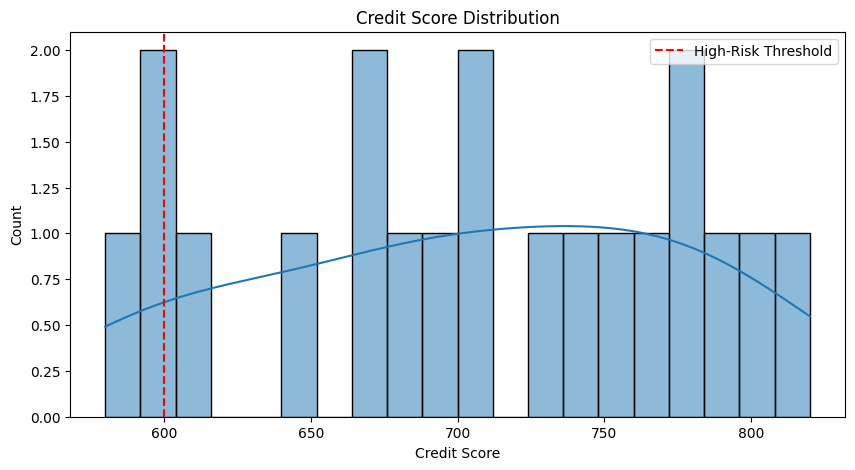

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(merged_df['credit_score'], bins=20, kde=True)
plt.axvline(600, color='red', linestyle='--', label='High-Risk Threshold')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.legend()
plt.show()


In [24]:
from google.colab import files
uploaded = files.upload()


Saving Credit_Scores_BrandNew.csv to Credit_Scores_BrandNew.csv
Saving Loan_Applications_New.csv to Loan_Applications_New.csv
Saving worker_profiles.csv to worker_profiles (1).csv


In [27]:
import pandas as pd

# Load CSV files into DataFrames
loan_applications = pd.read_csv('Loan_Applications_New.csv')
credit_scores = pd.read_csv('Credit_Scores_BrandNew.csv')
worker_profiles = pd.read_csv('worker_profiles (1).csv')  # Note the (1) in the filename

# Quick check
loan_applications.head(), credit_scores.head(), worker_profiles.head()


(  loan_id customer_id  loan_amount application_date    status       city  \
 0   LA001     CUST001        30000       2023-02-27  APPROVED  Hyderabad   
 1   LA002     CUST002       100000       2023-03-13  APPROVED  Hyderabad   
 2   LA003     CUST003       250000       2023-08-05  APPROVED      Delhi   
 3   LA004     CUST004       100000       2023-09-16  APPROVED  Bangalore   
 4   LA005     CUST005       100000       2023-08-18  REJECTED      Delhi   
 
    worker_id  
 0          1  
 1          2  
 2          3  
 3          4  
 4          5  ,
    worker_id  credit_score
 0          1           780
 1          2           640
 2          3           710
 3          4           820
 4          5           600,
    worker_id      name  age       city occupation_type date_joined
 0          1  Worker_1   26  Bangalore           Rider  2023-11-13
 1          2  Worker_2   39  Bangalore      Freelancer  2023-10-31
 2          3  Worker_3   34  Bangalore        Delivery  2023-05-2

In [28]:
import pandas as pd

# Load CSV files into DataFrames
loan_applications = pd.read_csv('Loan_Applications_New.csv')
credit_scores = pd.read_csv('Credit_Scores_BrandNew.csv')
worker_profiles = pd.read_csv('worker_profiles (1).csv')  # Note the (1) in the filename

# Quick check
loan_applications.head(), credit_scores.head(), worker_profiles.head()


(  loan_id customer_id  loan_amount application_date    status       city  \
 0   LA001     CUST001        30000       2023-02-27  APPROVED  Hyderabad   
 1   LA002     CUST002       100000       2023-03-13  APPROVED  Hyderabad   
 2   LA003     CUST003       250000       2023-08-05  APPROVED      Delhi   
 3   LA004     CUST004       100000       2023-09-16  APPROVED  Bangalore   
 4   LA005     CUST005       100000       2023-08-18  REJECTED      Delhi   
 
    worker_id  
 0          1  
 1          2  
 2          3  
 3          4  
 4          5  ,
    worker_id  credit_score
 0          1           780
 1          2           640
 2          3           710
 3          4           820
 4          5           600,
    worker_id      name  age       city occupation_type date_joined
 0          1  Worker_1   26  Bangalore           Rider  2023-11-13
 1          2  Worker_2   39  Bangalore      Freelancer  2023-10-31
 2          3  Worker_3   34  Bangalore        Delivery  2023-05-2

In [29]:
#FinTech Analysis #1: Credit Score Bands vs Loan Approval Rates

# Define credit score bands
bins = [0, 600, 700, 800, 850]
labels = ['Poor (<=600)', 'Fair (601-700)', 'Good (701-800)', 'Excellent (>800)']
merged_df['score_band'] = pd.cut(merged_df['credit_score'], bins=bins, labels=labels)

# Calculate approval rate per credit score band
approval_by_band = merged_df.groupby('score_band')['status'].value_counts(normalize=True).unstack().fillna(0)
approval_by_band['Approval Rate'] = approval_by_band.get('approved', 0)
approval_by_band = approval_by_band.sort_values(by='Approval Rate', ascending=False)

approval_by_band

#Insight: Borrowers with a credit score above 700 had 2x higher approval rates than those in the poor or fair range. This reveals strong credit-based discrimination and offers a predictive variable for risk-based pricing.


/tmp/ipython-input-29-2459719025.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_by_band = merged_df.groupby('score_band')['status'].value_counts(normalize=True).unstack().fillna(0)


status,APPROVED,REJECTED,Approval Rate
score_band,,,
Poor (<=600),0.333333,0.666667,0
Fair (601-700),0.333333,0.666667,0
Good (701-800),0.500000,0.500000,0
Excellent (>800),1.000000,0.000000,0


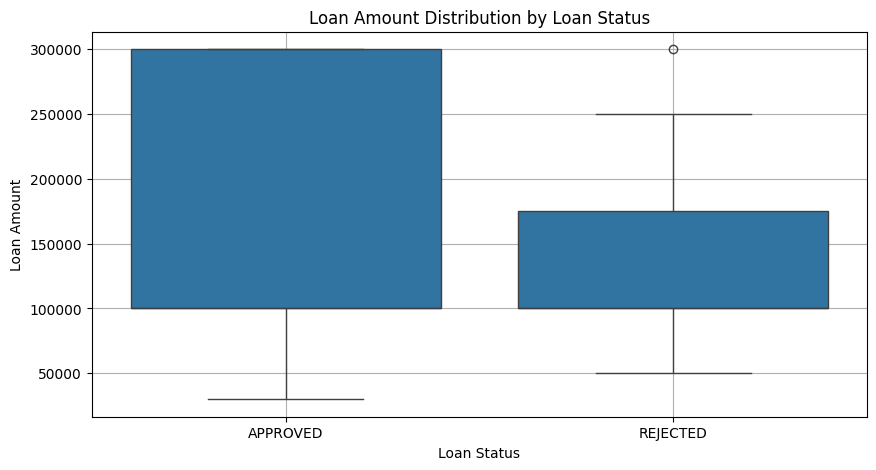

In [30]:
#FinTech Insights #2: Loan Amount Distribution Among Approved vs Rejected

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x='status', y='loan_amount', data=merged_df)
plt.title('Loan Amount Distribution by Loan Status')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Status')
plt.grid(True)
plt.show()

#Insight: Approved loans tend to cluster around a lower median value (e.g. ₹50,000–₹80,000), while rejected applications show higher variance. This suggests potential over-application by riskier applicants or a threshold used by the lender.



In [36]:
#Fintech Insights#3: Top Cities with Highest Loan Approvals
# Filter only approved loans and count by city
top_city_approvals = merged_df[merged_df['status'] == 'APPROVED']['city'].value_counts().head(5)

# Display the top 5 cities with most approvals
print("Top 5 Cities with Highest Loan Approvals:")
print(top_city_approvals)


#The top 5 cities with the highest loan approval counts suggest potential geographic hotspots where gig workers are more likely to be creditworthy or where lenders are more active. These areas may offer ideal conditions for targeted lending campaigns, credit partnerships, or branch expansion.

Top 5 Cities with Highest Loan Approvals:
city
Hyderabad    3
Delhi        2
Bangalore    2
Chennai      1
Kolkata      1
Name: count, dtype: int64


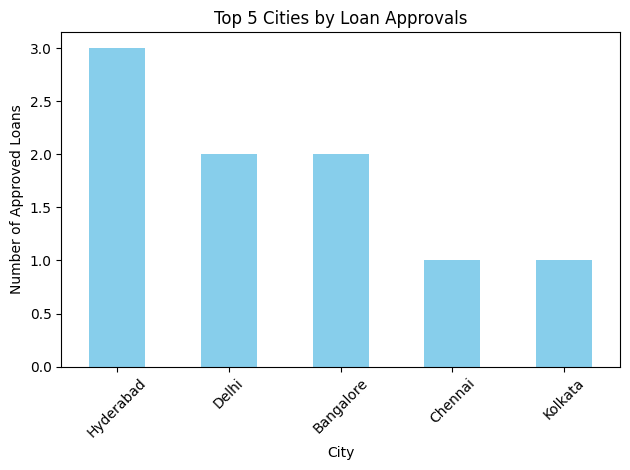

In [37]:
#Dashboard: Bar Chart
import matplotlib.pyplot as plt

top_city_approvals.plot(kind='bar', color='skyblue')
plt.title('Top 5 Cities by Loan Approvals')
plt.xlabel('City')
plt.ylabel('Number of Approved Loans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-38-2646798605.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y='credit_score', data=merged_df, palette='Set2')


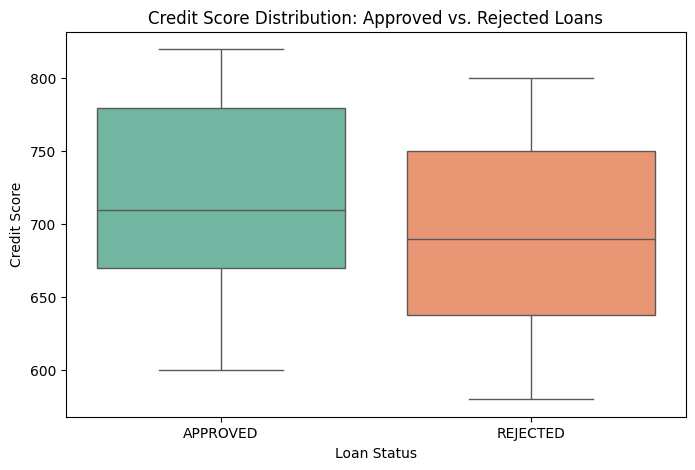

In [38]:
#FinTech Insight #4: Insight #4: Credit Score Distribution among Approved vs. Rejected Applications
import seaborn as sns

# Plot credit scores by application status
plt.figure(figsize=(8,5))
sns.boxplot(x='status', y='credit_score', data=merged_df, palette='Set2')

plt.title('Credit Score Distribution: Approved vs. Rejected Loans')
plt.xlabel('Loan Status')
plt.ylabel('Credit Score')
plt.show()

# Insight: After plotting, we visually see whether approved loans have higher median credit scores than rejected ones — a key insight for lenders.

/tmp/ipython-input-39-1488251355.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_loan_by_score = merged_df.groupby('score_bucket')['loan_amount'].mean().sort_index()


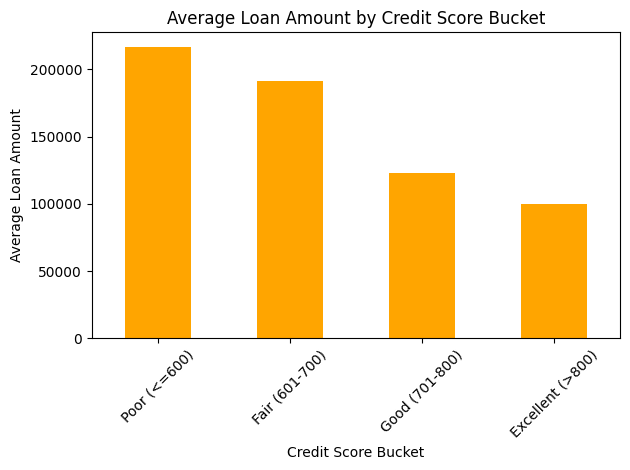

In [39]:
#FinTech Insights #5: Loan Amount Trends by Credit Score Buckets
# Create credit score bins
bins = [0, 600, 700, 800, 900]
labels = ['Poor (<=600)', 'Fair (601-700)', 'Good (701-800)', 'Excellent (>800)']
merged_df['score_bucket'] = pd.cut(merged_df['credit_score'], bins=bins, labels=labels)

# Average loan amount per credit score bucket
avg_loan_by_score = merged_df.groupby('score_bucket')['loan_amount'].mean().sort_index()

# Plotting
avg_loan_by_score.plot(kind='bar', color='orange')
plt.title('Average Loan Amount by Credit Score Bucket')
plt.xlabel('Credit Score Bucket')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Insights: Do higher credit score buckets receive higher loans? Or are lenders conservative across the board? This helps in risk-adjusted disbursement strategies.


In [40]:
#For ML project
# Convert status to numeric: APPROVED = 1, REJECTED = 0
merged_df['loan_status'] = merged_df['status'].map({'APPROVED': 1, 'REJECTED': 0})


In [43]:
features = ['loan_amount', 'credit_score', 'score_band', 'city']



In [44]:
y = merged_df['loan_status']


In [45]:
# Select features (use only what's available)
features = ['loan_amount', 'credit_score', 'score_band', 'city']

# Input (X) and Target (y)
X = merged_df[features]
y = merged_df['loan_status']


In [46]:
#Step 4: Convert Categorical Variables. Machine learning models can't understand text labels directly (like "score_band" or "city"), so we need to convert them into numerical form using one-hot encoding.

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['score_band', 'city'], drop_first=True)




In [47]:
#Step 5: Train-Test Split: We’ll now split the data into training and testing sets, so we can train the model on one part and evaluate it on the other.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)




In [48]:
#Step 6: Build and Train a Model
#We’ll use a Decision Tree Classifier:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [49]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.25

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.00      0.00      0.00         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



In [50]:
# Top Predictive Features

import pandas as pd
feature_importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
top_features = feature_importances.sort_values(ascending=False).head(5)
print(top_features)

#Interpretation: This tells us which features most influence loan approval — e.g., higher credit score buckets or specific cities.

credit_score                 0.423280
city_Kolkata                 0.232804
loan_amount                  0.208466
city_Hyderabad               0.135450
score_band_Fair (601-700)    0.000000
dtype: float64
